# Forecasting Faults in Electrical System Equipment to predict fault for manage the maintenance plan

## 1. Filter and Clean Import/Export CSV Data from GitHub
This script downloads a CSV file containing import/export trade data from a public GitHub repository.
It cleans the data by stripping whitespace, filters out rows where the trade flow is equal to "2",
and removes unnecessary columns. The cleaned and filtered data is then saved to a new CSV file
for further analysis or reporting.

In [ ]:
import pandas as pd

# This reads a CSV file from a GitHub URL.
input_file = 'https://raw.githubusercontent.com/Samuel-JULLY/KMUTNB_internship/refs/heads/main/DATA/import_export.csv'
df = pd.read_csv(input_file, sep=";", dtype=str)

# This removes leading and trailing spaces from all string values in the DataFrame.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Keeps only the rows where the value in the tradeflow column is not equal to "2"
df_filtré = df[df["tradeflow"] != "2"]

# Removes the heading11 and ETL_DATE columns from the filtered DataFrame.
df_filtré = df_filtré.drop('heading11', axis=1)
df_filtré = df_filtré.drop('ETL_DATE', axis=1)

# Saves the filtered data to a new CSV file inside a folder named RSLT/.
output_file = 'RSLT/import_export_filtre.csv'
df_filtré.to_csv(output_file, index=False,encoding="utf-8-sig")

# Displays the path to the saved file (in French: "Filtered file saved as").
print(f"Filtered file saved as: {output_file}")

In [ ]:
import pandas as pd

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/stat_export2566.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/stat_export2566.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/stat_export.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/stat_export.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/import_export.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/import_export.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

In [ ]:
import pandas as pd
import os

# Liste de fichiers à fusionner
fichiers = ["DATA\import_export.csv","DATA\stat_export2566.csv", "DATA\stat_export.csv"]

# Colonnes qu'on veut garder
colonnes_utiles = ["month","year",  "countryNameTH","productDetailTH","productDetailEN", "weight", "price"]

# Liste pour stocker les DataFrames partiels
liste_dfs = []

for fichier in fichiers:
    if os.path.exists(fichier):
        # Lire le fichier
        df = pd.read_csv(fichier )
        
        # Sélectionner uniquement les colonnes utiles (si elles existent)
        colonnes_disponibles = [col for col in colonnes_utiles if col in df.columns]
        df_filtre = df[colonnes_disponibles]

        liste_dfs.append(df_filtre)
    else:
        print(f"Fichier introuvable : {fichier}")

# Fusionner tous les morceaux
df_final = pd.concat(liste_dfs, ignore_index=True)

# Sauvegarder dans un nouveau fichier
df_final.to_csv("fusion_partielle.csv", index=False, encoding="utf-8")

print("Fusion terminée. Fichier : fusion_partielle.csv")


Fusion terminée. Fichier : fusion_partielle.csv


RMSE: 592509.64


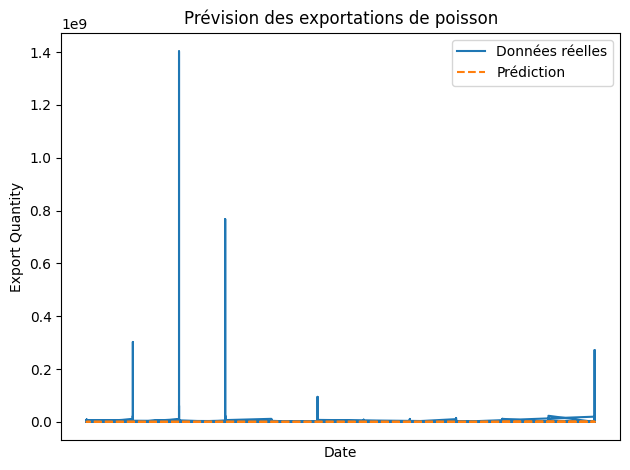

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Charger les données
df = pd.read_csv("RSLT/import_export_filtre.csv")

# Convertir la date en valeur numérique (ex: nombre de mois écoulés)
df['month'] = pd.to_datetime(df['month'])
df['month_num'] = (df['month'] - df['month'].min()).dt.days // 30

# Définir X et y
X = df[['month_num']]
y = df['quantity']

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédire
y_pred = model.predict(X_test)

# Évaluer
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Affichage
plt.plot(df['month'], y, label="Données réelles")
plt.plot(df['month'].iloc[y_test.index], y_pred, label="Prédiction", linestyle="--")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Export Quantity")
plt.title("Prévision des exportations de poisson")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Classification Models

We are testing several machine learning models:

* Logistic Regression
* Perceptron
* SVM (Support Vector Machine)
* Decision Trees
* Random Forest
* K-Nearest Neighbors (KNN)
* Naïve Bayes

We will apply the same training method to the different models we are going to test and compare their performance.

### 2.1 Splitting the Dataset into Training and Test Sets
We use `train_test_split` to divide the data:

* 80% for training the model.
* 20% for testing its performance.

This allows us to measure the model’s ability to generalize.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.2 Training Classification Models

**1 - Model Training**

The model is created and trained on training data.

---

**2 - Prediction on the test set**

The model makes predictions on the test set to evaluate its performance.

--- 

**3 - Confusion Matrix**

Displays a table showing the number of ***correct and incorrect predictions***.

* Helps analyze ***classification errors***.
* Shows how many ***false positives and false negatives*** are produced.

---

**4 - Classification Report**

Displays the model evaluation metrics with `classification_report()`

* ***Precision***: Proportion of true positive predictions.
* ***Recall***: Ability to detect all positive classes.
* ***F1-score***: Harmonic mean between precision and recall.

---

**6 - AUC-ROC Score**

Calculates the area under the ROC curve, a global indicator of model quality.

* The closer the AUC is to ***1***, the better the model.
* An AUC of ***0.5*** means the model is ***predicting randomly***.

---

**7 - ROC curve**

Plots the ***ROC curve***, which shows the trade-off between the false positive rate and the true positive rate.

* Helps analyze the ***optimal classification threshold***.
* A curve close to the top-left corner indicates a ***good model***.

### 2.3 Applying the Models

1. Logistic Regression

2. Perceptron

3. SVM

4. Decision Trees

5. Random Forest

6. KNN

7. Naïve Bayes